In [124]:
from scipy import integrate
import numpy as np
import sympy as sym
import math as m
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt
#@matplotlib inline

r=np.load('r_for_W.npy')
W11_r=np.load('W_r_mos2.npy')

In [125]:
from scipy.integrate import quad


#квадрат волновой функции
def wavefunc(x,aa):
    return 2*np.exp(-2*x/aa)/(aa**2*np.pi)

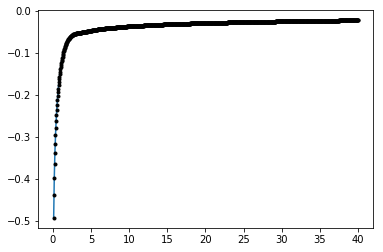

In [126]:
W11r = interp1d(r,W11_r,kind='linear')
plt.plot(r,W11r(r))
plt.plot(r,W11_r,'k.')

def integrand11(rr,a):
    return 2*np.pi*rr*wavefunc(rr,a)*W11r(rr)*27.21
    
def V11(a):    
    return integrate.quad(integrand11, r[0], r[-1], args=(a,), limit=200)[0]

In [127]:
a=np.linspace(1,40,100)
VV=np.zeros(100)

for i in range(100):
    VV[i]=V11(a[i])

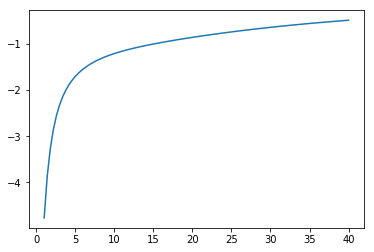

In [128]:
plt.plot(a,VV)

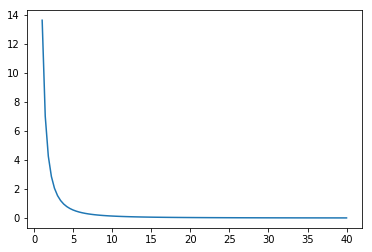

In [135]:
m0=9.1e-31 ### kg
hbar=1.05e-34 ### J s
m1e=0.55*m0
m1h=0.56*m0
mu11=m1e*m1h/(m1e+m1h)
JtoeV = 1./1.6e-19

### K11 in eV
def K11(a):
    ainm=a*1.e-10 ### A to m
    return JtoeV*hbar**2/(2*mu11*ainm**2)

a=np.linspace(1,40,100) # in A
KK=np.zeros(100)

for i in range(100):
    KK[i]=K11(a[i])
    
    
plt.plot(a,KK)

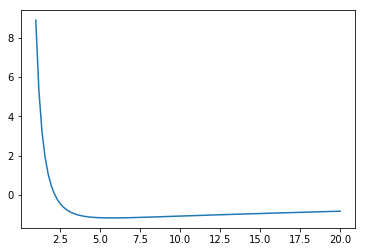

In [136]:
a=np.linspace(1,20,100)
H11=np.zeros(100)

#def energy(a):
#    H11=K11(a)+V11(a)
#    return H11
for i in range(100):
    H11[i]=K11(a[i])+V11(a[i])

plt.plot(a,H11)

In [137]:
min(H11)

-1.1695475762730831